# Agrupamento

[Dataset Mall Customers](https://www.kaggle.com/shwetabh123/mall-customers)

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

## EDA

In [ ]:
# Download:
# https://drive.google.com/file/d/1l45nFMoIWcIUGxuACKcgtPECSKYte1NC/view?usp=sharing

# read:
# df = pd.read_csv('Mall_Customers.csv')

df = pd.read_csv('https://docs.google.com/uc?export=download&id=1l45nFMoIWcIUGxuACKcgtPECSKYte1NC')
df.head()

In [ ]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

## Visualização

In [ ]:
plt.style.use('fivethirtyeight')

### Histogramas

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Income' , 'Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Gender

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Relação entre Age, Income e Score

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Income' , 'Score']:
    for y in ['Age' , 'Income' , 'Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Income' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Income') 
plt.title('Age vs Income')
plt.legend()
plt.show()

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Income',y = 'Score' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Income'), plt.ylabel('Score') 
plt.title('Income vs Score')
plt.legend()
plt.show()

### Distribuição de valores: Age, Income e Score (por Gênero/Gender)

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Income' , 'Score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# **Clusterização com K- means**

## 1. Segmentação usando Age e Score

In [ ]:
'''Age e Score'''
X1 = df[['Age' , 'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Escolhendo K com base no método do **Cotovelo**

A Curva de Cotovelo (ou Método Elbow Curve) testa a variância dos dados em relação ao número de clusters. 

* O valor ideal de `K` é aquele que tem um menor Within Sum of Squares (WSS) e ao mesmo tempo o menor número de clusters. 

* Chamamos de curva de cotovelo, porque a partir do ponto que seria o “cotovelo” não existe uma discrepância tão significativa em termos de variância.

* No scikit-learn, o WSS pode ser obtido através do atributo inertia_. 

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# Vamos executar o K-means com K=4

algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Score' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Score') , plt.xlabel('Age')
plt.show()

## 2. Segmentação usando Income e Score

In [ ]:
'''Income e Score'''
X2 = df[['Income' , 'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Num. Clusters') , plt.ylabel('Inertia')

plt.show()

In [ ]:
# vamos executar com K=5

algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income' ,y = 'Score' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Score') , plt.xlabel('Income')
plt.show()

## 3.Segmentação usando Age, Income e Score

In [ ]:
X3 = df[['Age' , 'Income' ,'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Num. Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
# Vamos executar com K=6

algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Score'],
    z= df['Income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Score'),
            zaxis = dict(title  = 'Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# K-means não funciona bem com dados categóricos (e.g., Gender)

Explicação interessante em:

https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided

Algoritmos baseados no k-means para lidar com dados categóricos (k-Modes and k-Prototype):

https://towardsdatascience.com/clustering-algorithm-for-data-with-mixed-categorical-and-numerical-features-d4e3a48066a0

Mais detalhes para quem quiser se aprofundar:

https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b

# Incluindo o Ajuste da Escala

### Aplicando o StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#lista de colunas a transformar
cols_to_scale = ['Age', 'Income', 'Score']

#fit
scaler = StandardScaler()
scaler.fit(df[cols_to_scale])

#transform
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

# mostra o head novamente
df.head()

### Segmentação usando Income e Score

In [ ]:
'''Age e Score'''
X2 = df[['Income' , 'Score']].iloc[: , :].values

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

### Selecionando o parâmetro K

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Num. Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(  x = 'Income' ,y = 'Score' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Income') , plt.xlabel('Score')
plt.show()

# **Alternativas para a escolha da quantidade de clusters**

## Automatizando a busca pelo Cotovelo

Método sugerido [aqui](https://github.com/bhattbhavesh91/k_means_iris_dataset/blob/master/K_in_K_means_Clustering.ipynb).

### Segmentação usando Income e Score

In [ ]:
'''Age e Score'''
X2 = df[['Income' , 'Score']].iloc[: , :].values

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Num. Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.plot([1, 10], [inertia[0], 
                        inertia[9]], 'bo-')
plt.xlabel('Num. Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
x = [1, 10]
y = [inertia[0], inertia[9]]

# Calculate the coefficients. This line answers the initial question. 
coefficients = np.polyfit(x, y, 1)

# Print the findings
print ('a =', coefficients[0])
print ('b =', coefficients[1])

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(0,9,100)
y_axis = polynomial(x_axis)

# ...and plot the points and the line
plt.plot(x_axis, y_axis)
plt.grid('on')
plt.show()

In [ ]:
# Função para encontrar a distância
# https://www.geeksforgeeks.org/perpendicular-distance-between-a-point-and-a-line-in-2-d/
def calc_distance(x1, y1, a, b, c):
  d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
  return d

In [ ]:
# (y1 – y2)x + (x2 – x1)y + (x1y2 – x2y1) = 0
# https://bobobobo.wordpress.com/2008/01/07/solving-linear-equations-ax-by-c-0/
a = inertia[0] - inertia[9]
b = 10 - 1
c1 = 1 * inertia[9]
c2 = 10 * inertia[0]
c = c1 - c2

In [ ]:
inertia

In [ ]:
import math

distance_of_points_from_line = []
for k in range(0 , 10):
  distance_of_points_from_line.append(
      calc_distance(k, inertia[k], a, b, c))

In [ ]:
distance_of_points_from_line

In [ ]:
plt.plot(range(1 , 11), distance_of_points_from_line)

## Métrica da Silhueta

Verifica se média das distâncias dentro do cluster é menor que a média de distâncias até o cluster vizinho mais próximo.

### Fórmula:

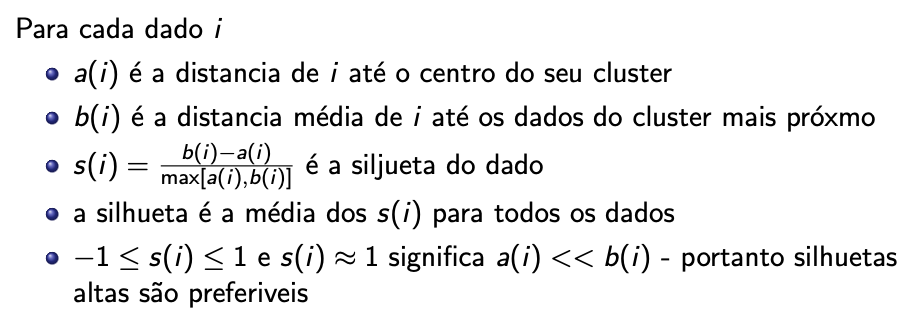

### Documentação do scikit-learn:

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

### Exemplo com scikit-learn

In [ ]:
from sklearn.metrics import silhouette_score

for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    labels2 = algorithm.labels_

    silhouette = silhouette_score(X2, labels2)

    print(
        "n_clusters =",
        n,
        "| silhouette_score = ",
        silhouette
    )

## Outras métricas

https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [ ]:
from sklearn.metrics import silhouette_score , calinski_harabasz_score, davies_bouldin_score


for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    labels2 = algorithm.labels_

    silhouette = silhouette_score(X2, labels2) # valores mais altos são melhores
    calinski = calinski_harabasz_score(X2, labels2) # valores mais altos são melhores
    davies = davies_bouldin_score(X2, labels2) # valores próximos a zero são melhores

    print(
        "n_clusters =",
        n,
        "| silhouette_score = ",
        silhouette,
        "| calinski_harabasz_score = ",
        calinski,
        "| davies_bouldin_score = ",
        davies,
    )